# Working with widgets
In this notebook we demonstrate how to load images, labels and corresponding measurements into a Napari viewer and how to open the Dimensionality Reduction, Clustering and Plotting widgets of the napari-clusters-plotter.

In [1]:
from napari_clusters_plotter._dock_widget import PlotterWidget
from napari_clusters_plotter._dimensionality_reduction import DimensionalityReductionWidget
from napari_clusters_plotter._clustering import ClusteringWidget

from skimage.io import imread
from skimage.measure import label
import napari_skimage_regionprops as nsr
import napari

We initially load some example image and segment it.

In [2]:
image = imread("../example_data/blobs.tif")

In [3]:
labels = label(image > 128)

Next we perform quantiative measurements and store them in a dictionary.

In [4]:
statistics = nsr.regionprops_table(image, labels, size=True, intensity=True)

PROPERTIES =  ['label', 'area', 'bbox_area', 'equivalent_diameter', 'convex_area', 'max_intensity', 'mean_intensity', 'min_intensity']


## Viewing data in Napari
We now open a Napari viewer, show the image, the corresponding label image and the quantiative measurements in a table.

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


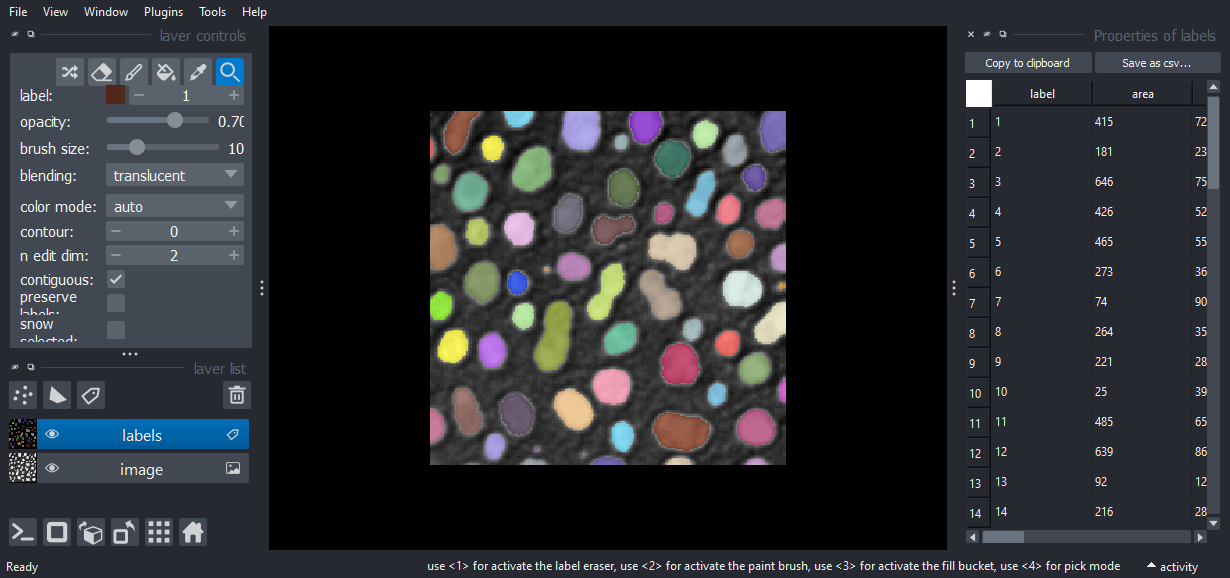

In [5]:
viewer = napari.Viewer()
viewer.add_image(image)
labels_layer = viewer.add_labels(labels)
labels_layer.properties = statistics

table_widget = nsr.add_table(labels_layer, viewer)

napari.utils.nbscreenshot(viewer)

In [6]:
table_widget.hide()

## Adding widgets
Next we add widgets for Dimensionality reduction, Clustering and/or Plotting.

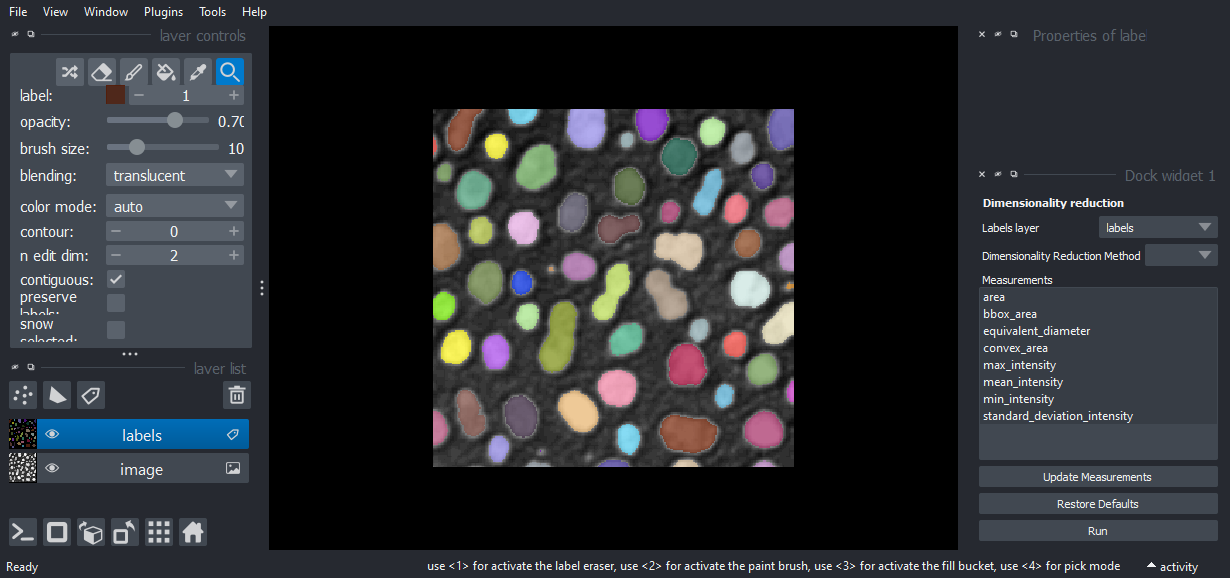

In [7]:
dimensionality_reduction_widget = DimensionalityReductionWidget(viewer)
dimensionality_reduction_dock_widget = viewer.window.add_dock_widget(dimensionality_reduction_widget)

napari.utils.nbscreenshot(viewer)

In [8]:
dimensionality_reduction_dock_widget.hide()

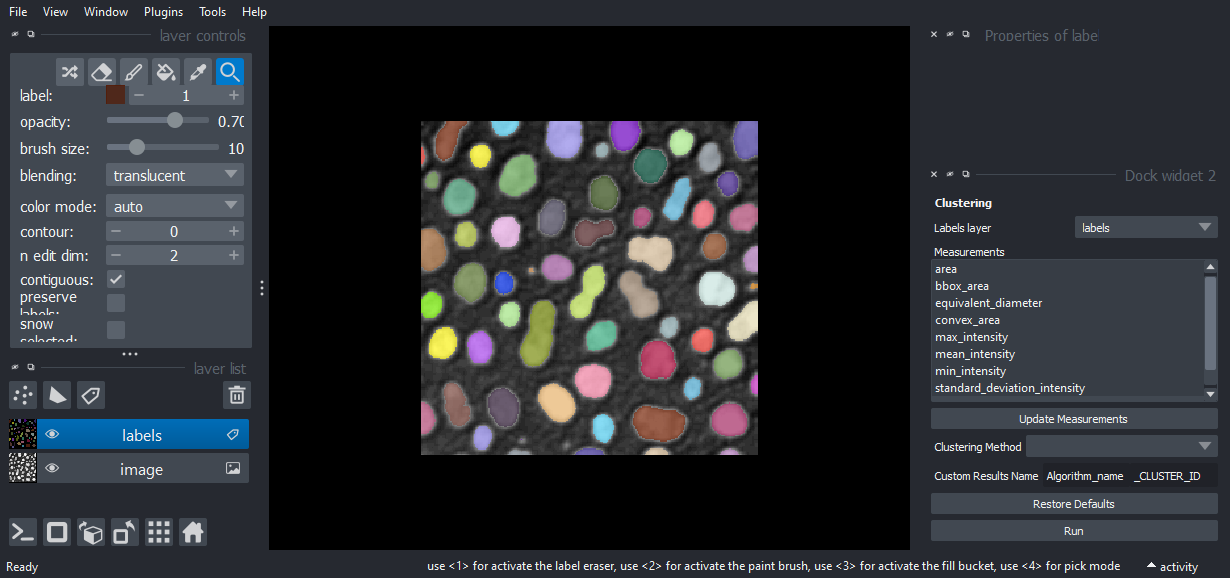

In [9]:
clustering_widget = ClusteringWidget(viewer)
clustering_dock_widget = viewer.window.add_dock_widget(clustering_widget)

napari.utils.nbscreenshot(viewer)

In [10]:
clustering_dock_widget.hide()

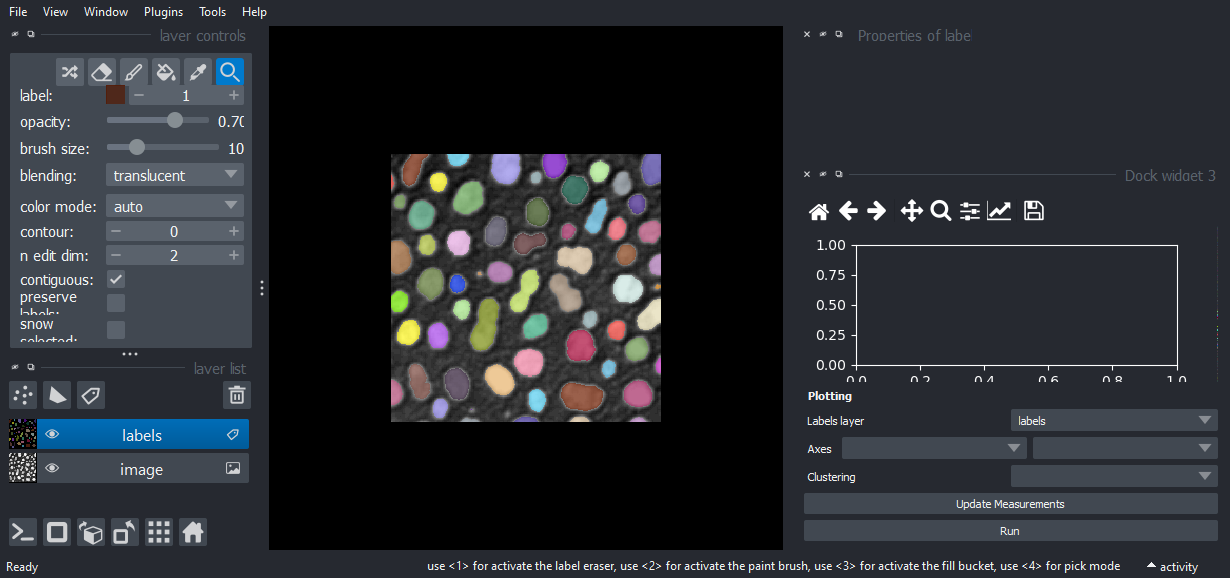

In [11]:
plotter_widget = PlotterWidget(viewer)
plotter_dock_widget = viewer.window.add_dock_widget(plotter_widget)

napari.utils.nbscreenshot(viewer)

In [12]:
plotter_dock_widget.hide()